# **Diversion Data Exploratory Analysis**

Author: Bridget Bittmann

Date Created: 09/14/2021

Date Modified: 09/14/2021

In [62]:
#Import necessary packages

import pandas as pd #to work with data arrays
!pip install geopandas
import geopandas as gpd #to work with spatial data
import numpy as np #to work with arrays and statistics
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
#Navigate to your directory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
#Import data files

div_wd63 = pd.read_csv('/content/drive/MyDrive/spatial_colab/datasets/diversion_timeseries/WD63.csv', parse_dates=['DiversionDate'], index_col=['DiversionDate'])
print(div_wd63.dtypes)

WaterDistrictNumber             int64
HydrologyID                     int64
DiversionName                  object
DiversionTypeDescription       object
MeasurementTypeDescription     object
CFS                           float64
dtype: object


In [32]:
#Subset by known canals

ny_canal = div_wd63[div_wd63['DiversionName'] == 'NEW YORK'] #export data for new york canal
siebenberg_canal = div_wd63[div_wd63['DiversionName'] == 'SEIBENBERG'] #export data for seibenberg canal
print(ny_canal)

               WaterDistrictNumber  ...     CFS
DiversionDate                       ...        
2010-11-09                      63  ...    0.00
2010-12-14                      63  ...    0.00
2010-12-30                      63  ...    0.00
2011-01-17                      63  ...    0.00
2011-01-18                      63  ...    0.00
...                            ...  ...     ...
2021-03-27                      63  ...  737.78
2021-03-28                      63  ...  736.84
2021-03-29                      63  ...  738.39
2021-03-30                      63  ...  738.63
2021-03-31                      63  ...  732.67

[5196 rows x 6 columns]


In [38]:
#extract just a certain year from New York canal

div_wd63.head()
div_wd63.info()
div_wd63.index


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497541 entries, 2003-05-21 to 2020-11-26
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   WaterDistrictNumber         497541 non-null  int64  
 1   HydrologyID                 497541 non-null  int64  
 2   DiversionName               497541 non-null  object 
 3   DiversionTypeDescription    497541 non-null  object 
 4   MeasurementTypeDescription  497541 non-null  object 
 5   CFS                         497541 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.6+ MB


DatetimeIndex(['2003-05-21', '2003-04-26', '2003-05-19', '2003-04-03',
               '2003-04-24', '2003-05-24', '2003-05-25', '2003-05-26',
               '2003-04-01', '2003-04-02',
               ...
               '2020-11-18', '2020-11-19', '2020-11-27', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26'],
              dtype='datetime64[ns]', name='DiversionDate', length=497541, freq=None)

Text(0, 0.5, 'Discharge (cfs)')

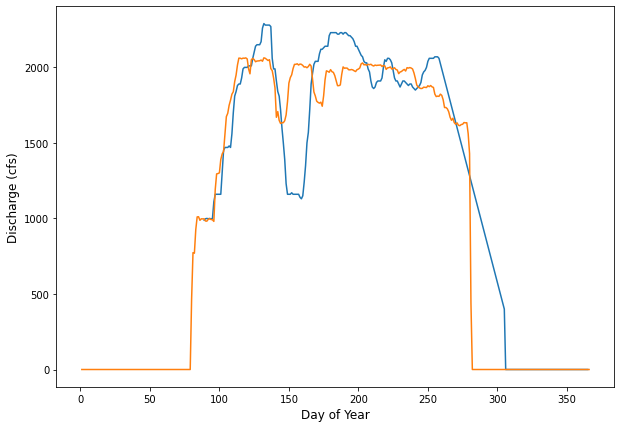

In [99]:
#Plot the timeseries

#select just the 2010 year
ny_2010 = ny_canal[ny_canal.index.year == 2010] #index years for 2010
ny_2010 = ny_2010.sort_index() #sort by oldest to newest
ny_2020 = ny_canal[ny_canal.index.year == 2020] #index years for 2020
ny_2020 = ny_2020.sort_index()

fig1 = plt.figure(figsize=(10,7)) #create a figure
ax = fig1.add_subplot(1,1,1) #create an axes position for subplot
ax.plot(ny_2010.index.dayofyear, ny_2010['CFS']) #plot the data
ax.plot(ny_2020.index.dayofyear, ny_2020['CFS'])
ax.set_xlabel('Day of Year', fontsize = 12) #create an x-axis label
ax.set_ylabel('Discharge (cfs)', fontsize = 12) #create a y-axis label
#plt.setp(ax.get_xticklabels(), rotation = 45) #rotate the axis to read better

#format dates so years are on top of one another
#formatdates = DateFormatter('%m-%d')
#ax.xaxis.set_major_formatter(formatdates)
#plt.show()


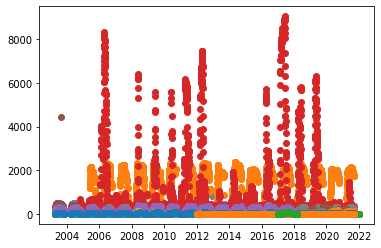

In [23]:
# figure out the names of each of the canals

hydro_id = np.unique(div_wd63['HydrologyID'])

for n in hydro_id: 
  canal = div_wd63[div_wd63['HydrologyID']== n]
  plt.scatter(canal['DiversionDate'], canal['CFS'])